<font size="5">Section 6: Structural Equation Modelling</font>

## Housekeeping and Data

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn
import scipy 
from scipy.linalg import eigh, cholesky
from scipy.stats import norm
import linearmodels.panel as lmp
from pylab import plot, show, axis, subplot, xlabel, ylabel, grid
import semopy 
import seaborn as sns
from factor_analyzer import FactorAnalyzer
from sklearn.decomposition import PCA

%matplotlib inline

print("Librerias cargadas");

Librerias cargadas


   sexo  edad  imce  vive_padre  vive_madre  sk1  sk2  sk3  sk4  sk5  ...  \
1     0    76  0.71           0           1    1    1    1    1    1  ...   
3     1    84  2.05           1           1    1    1    1    1    1  ...   
4     0    86  1.05           1           1    1    1    1    1    1  ...   
5     0    74  1.39           1           1    1    2    1    1    1  ...   
6     1    91  2.75           1           1    1    1    1    2    2  ...   

   sk9  sk10  sk11  sk12  sk13  act_fisica  area  educm  educp  madre_work  
1    1     1     1     1     1         5.0     0    8.0      8           1  
3    1     1     1     1     1         2.0     1   16.0     12          -1  
4    1     1     1     1     1         1.0     1   17.0     15           0  
5    1     1     1     1     1         4.0     0    8.0      8          -1  
6    3     3     3     2     2         2.0     1   20.0     19           1  

[5 rows x 23 columns]
Size junaeb: 57357
1    41337
0    15998
2       22


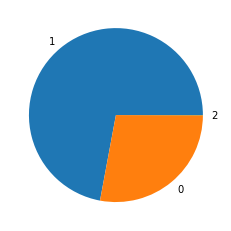

Size junaeb: 57335
1    55828
0     1419
2       88
Name: vive_madre, dtype: int64


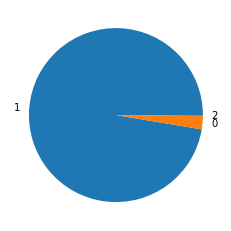

Size junaeb: 57247
3.0    20855
2.0    19969
1.0     8774
5.0     4660
4.0     2989
Name: act_fisica, dtype: int64


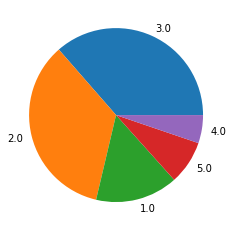

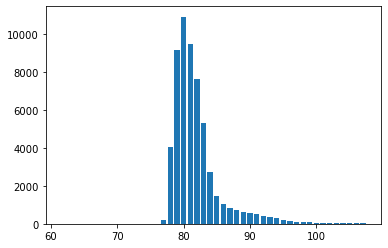

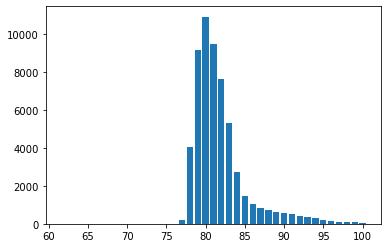

Size junaeb: 56976


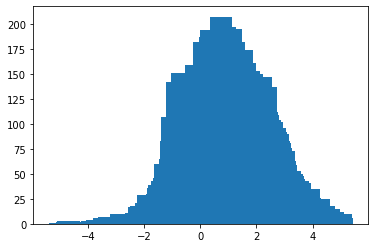

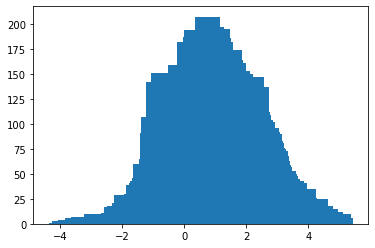

Size junaeb: 56913


In [40]:
import pandas as pd
junaeb2 = pd.read_csv(open('junaeb2.csv'));
junaeb2.dropna(inplace=True);

print(junaeb2.head(5))
print("Size junaeb:",len(junaeb2));

import matplotlib.pyplot as plt

#Revisar vive_padre
print(junaeb2["vive_padre"].value_counts());
graf = junaeb2["vive_padre"].value_counts().to_frame().reset_index();
graf.columns = ["vive_padre", "rep"];
plt.pie(graf.rep, labels=graf.vive_padre);
plt.show();

#Existen valores incorrectos para Vive_padre; se procede a eliminar las filas problematicas.
junaeb2 = junaeb2[junaeb2["vive_padre"] < 2];

print("Size junaeb:",len(junaeb2));

#Revisar vive_madre
print(junaeb2["vive_madre"].value_counts());
graf = junaeb2["vive_madre"].value_counts().to_frame().reset_index();
graf.columns = ["vive_madre", "rep"];
plt.pie(graf.rep, labels=graf.vive_madre);
plt.show();

#Existen valores incorrectos para Vive_madre; se procede a eliminar las filas problematicas.
junaeb2 = junaeb2[junaeb2["vive_madre"] < 2];

print("Size junaeb:",len(junaeb2));

#Revisar act_fisica
print(junaeb2["act_fisica"].value_counts());
graf = junaeb2["act_fisica"].value_counts().to_frame().reset_index();
graf.columns = ["act_fisica", "rep"];
plt.pie(graf.rep, labels=graf.act_fisica);
plt.show();

#No hay problemas con act_fisica;

#En busca de datos atipicos para edad:
graf = junaeb2["edad"].value_counts().to_frame().reset_index();
graf.columns = ["edad", "rep"];
plt.bar(graf.edad, graf.rep);
plt.show();

#Edades mayores a 100 meses parecen ser atipicas; se procede a eliminarlas.
junaeb2 = junaeb2[junaeb2["edad"] <= 100];
graf = junaeb2["edad"].value_counts().to_frame().reset_index();
graf.columns = ["edad", "rep"];
plt.bar(graf.edad, graf.rep);
plt.show();

print("Size junaeb:",len(junaeb2));

#En busca de datos atipicos para imce:
graf = junaeb2["imce"].value_counts().to_frame().reset_index();
graf.columns = ["imce", "rep"];
plt.bar(graf.imce, graf.rep);
plt.show();

#Datos menores a 4 parecen ser atipicos; se procede a eliminarlos.
junaeb2 = junaeb2[junaeb2["imce"] > -4];
graf = junaeb2["imce"].value_counts().to_frame().reset_index();
graf.columns = ["imce", "rep"];
plt.bar(graf.imce, graf.rep);
plt.show();

print("Size junaeb:",len(junaeb2));

In [41]:
#import pandas as pd
#junaeb2 = pd.read_csv("junaeb2.csv");
#junaeb2.dropna();
#print(junaeb2.describe());

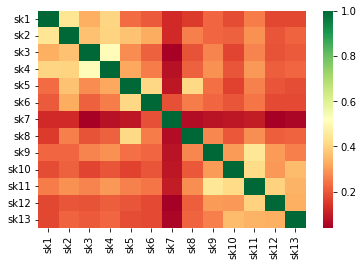

In [42]:
junaeb_sk = junaeb2[["sk1","sk2","sk3","sk4","sk5","sk6","sk7","sk8","sk9","sk10","sk11","sk12","sk13"]];
sns.heatmap(junaeb_sk.corr(), cmap='RdYlGn');

## PCA

PCA for continous variables in this example using sklearn. We can select the number of components to be estimated or use *'mle'* to determine the optimal number of eigenvalues based on the variance of the data.

Then we can report the Scree Plot that shows the percentage of variance that each component contributes. Based on the results, the data can be summarized using three components.

Finally, we can use the estimated components and transform them into a data frame. We can also show that, by construction, the components are orthogonal (zero covariance).

In [43]:
pca = PCA(n_components=12)
pca_features = pca.fit_transform(junaeb_sk)
print(pca.explained_variance_ratio_)

[0.28525254 0.18841593 0.10009252 0.07957987 0.06664283 0.06384182
 0.05191819 0.04374313 0.03253851 0.02952205 0.02489236 0.02100424]


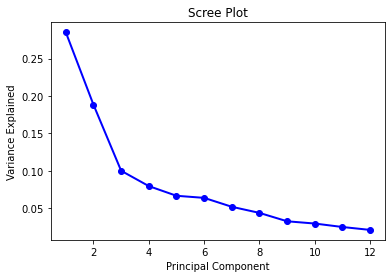

In [44]:
#scree plot using explained variance proportion

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [45]:
pca = PCA(n_components='mle')
pca_features = pca.fit_transform(junaeb_sk)
print(pca.explained_variance_ratio_)

[0.28525254 0.18841593 0.10009252 0.07957987 0.06664283 0.06384182
 0.05191819 0.04374313 0.03253851 0.02952205 0.02489236 0.02100424]


In [74]:
pca_vectors = pd.DataFrame(data = pca.components_)
pca_vectors.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.103302,0.228642,0.168986,0.184768,0.184115,0.251378,0.346552,0.292069,0.239423,0.405311,0.287634,0.291961,0.426953
1,0.007703,0.031697,0.063296,0.053835,0.039844,-0.030218,-0.924702,0.101139,0.086020,0.166476,0.101969,0.154169,0.234409
2,0.083438,0.267486,0.183230,0.190436,0.296712,0.333176,-0.114281,0.481659,0.078661,-0.391158,-0.001543,-0.088510,-0.490430
3,0.002100,-0.022221,-0.031447,-0.024919,-0.042494,0.004191,-0.036235,-0.094394,0.102458,0.697704,0.145311,0.015072,-0.683530
4,0.151223,0.294643,0.312277,0.304854,-0.014437,0.181733,-0.039170,-0.755795,0.086425,-0.181262,0.088780,0.200126,-0.074912


In [76]:
pca_df = pd.DataFrame(data=pca_features,columns=['PC1', 'PC2', 'PC3', "PC4", "PC5", "PC6", "PC7", "PC8", "PC9", "PC10", "PC11", "PC12"])
pca_df.describe().apply(lambda s: s.apply('{0:.3f}'.format))

ValueError: Shape of passed values is (56913, 12), indices imply (56913, 5)

In [73]:
pca_df.corr().apply(lambda s: s.apply('{0:.3f}'.format))

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
PC1,1.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000
PC2,0.000,1.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,0.000
PC3,0.000,0.000,1.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000
PC4,-0.000,-0.000,-0.000,1.000,0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000
PC5,0.000,-0.000,-0.000,0.000,1.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000
PC6,-0.000,-0.000,-0.000,0.000,-0.000,1.000,0.000,0.000,-0.000,0.000,0.000,0.000
PC7,-0.000,-0.000,-0.000,0.000,-0.000,0.000,1.000,-0.000,0.000,-0.000,-0.000,0.000
PC8,-0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,1.000,-0.000,0.000,0.000,0.000
PC9,0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,1.000,-0.000,-0.000,-0.000
PC10,-0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,1.000,0.000,0.000


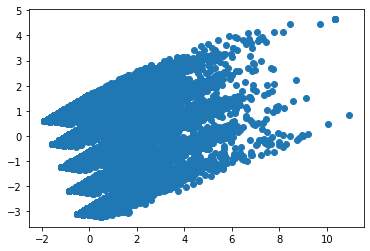

In [49]:
plt.scatter(pca_df['PC1'],pca_df['PC2'])

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


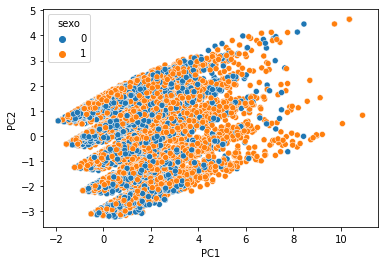

In [50]:
v = "sexo";
pca_df[v] = 0;
pca_df[v] = np.where(junaeb2[v] > 0, 1, pca_df[v]);
sns.scatterplot('PC1', 'PC2', data=pca_df, hue=v);

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


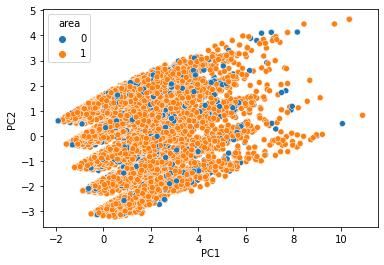

In [51]:
v = "area";
pca_df[v] = 0;
pca_df[v] = np.where(junaeb2[v] > 0, 1, pca_df[v]);
sns.scatterplot('PC1', 'PC2', data=pca_df, hue=v);

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


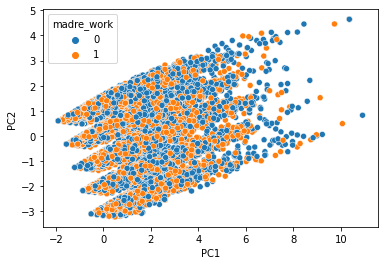

In [52]:
v = "madre_work";
pca_df[v] = 0;
pca_df[v] = np.where(junaeb2[v] > 0, 1, pca_df[v]);
sns.scatterplot('PC1', 'PC2', data=pca_df, hue=v);

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


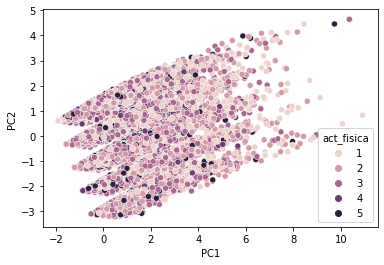

In [53]:
v = "act_fisica";
pca_df[v] = 0;
pca_df[v] = np.where(junaeb2[v] > 0, 1, pca_df[v]);
pca_df[v] = np.where(junaeb2[v] > 1, 2, pca_df[v]);
pca_df[v] = np.where(junaeb2[v] > 2, 3, pca_df[v]);
pca_df[v] = np.where(junaeb2[v] > 3, 4, pca_df[v]);
pca_df[v] = np.where(junaeb2[v] > 4, 5, pca_df[v]);


sns.scatterplot('PC1', 'PC2', data=pca_df, hue=v);

## EFA

EFA example using factor_analyzer library. Output shows the factor loadings for each factor, and the eigenvalues, which can be used to construct a scree plot. Number of factors can be chosen or estimated optimally from the data.

Using the semopy library we can also infer which variables belong to each factor, based on the estimated factor loadings (criteria does not restrict unique loadings to each factor). Estimated number of factors chosen optimally base on the data.

Note that semopy yields less factors than factor_analyzer. The difference is due that factor_analyzer reports factors until eigenvalues are irrelevant (variance explained), while semopy presents a potential EFA where all coeficients are statistically significant. In this case, the third factor is mainly only loading to X1 an it contributes to a small proportion of the total explained variance.

Finally semopy reports that the variance-covariance matrix in the dataframe is not positive definite, meaning that some variables are highly correlated (as expected by design), meaning that estimates are likely to be untrustworty. 

In [54]:
print(junaeb_sk["sk7"])

junaeb_sk["sk7"][junaeb_sk["sk7"] == 1] = 11;
junaeb_sk["sk7"][junaeb_sk["sk7"] == 2] = 12;
junaeb_sk["sk7"][junaeb_sk["sk7"] == 4] = 14;
junaeb_sk["sk7"][junaeb_sk["sk7"] == 5] = 15;

print(junaeb_sk["sk7"])
junaeb_sk["sk7"][junaeb_sk["sk7"] == 11] = 5;
junaeb_sk["sk7"][junaeb_sk["sk7"] == 12] = 4;
junaeb_sk["sk7"][junaeb_sk["sk7"] == 14] = 2;
junaeb_sk["sk7"][junaeb_sk["sk7"] == 15] = 1;

print(junaeb_sk["sk7"])

# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(rotation='promax')
fa.fit(junaeb_sk)

1        4
3        2
4        3
5        4
6        3
        ..
59994    1
59995    1
59996    1
59997    1
59998    5
Name: sk7, Length: 56913, dtype: int64
1        14
3        12
4         3
5        14
6         3
         ..
59994    11
59995    11
59996    11
59997    11
59998    15
Name: sk7, Length: 56913, dtype: int64


C:\Users\usuario\AppData\Local\Temp\ipykernel_3564\378088951.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  junaeb_sk["sk7"][junaeb_sk["sk7"] == 1] = 11;
C:\Users\usuario\AppData\Local\Temp\ipykernel_3564\378088951.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  junaeb_sk["sk7"][junaeb_sk["sk7"] == 2] = 12;
C:\Users\usuario\AppData\Local\Temp\ipykernel_3564\378088951.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  junaeb_s

1        2
3        4
4        3
5        2
6        3
        ..
59994    5
59995    5
59996    5
59997    5
59998    1
Name: sk7, Length: 56913, dtype: int64


C:\Users\usuario\AppData\Local\Temp\ipykernel_3564\378088951.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  junaeb_sk["sk7"][junaeb_sk["sk7"] == 15] = 1;


FactorAnalyzer(rotation_kwargs={})

In [55]:
fa.loadings_

array([[ 0.01350552,  0.60881963, -0.03904322],
       [-0.03658412,  0.49751235,  0.22885514],
       [ 0.02556423,  0.64288366, -0.04257935],
       [ 0.00366227,  0.73834323, -0.03348265],
       [-0.1473052 , -0.02877084,  0.86253444],
       [ 0.00652683,  0.04225157,  0.51449481],
       [-0.01502397, -0.04067391, -0.13991836],
       [ 0.14670562, -0.1068572 ,  0.51293591],
       [ 0.4818045 ,  0.0833833 ,  0.05042904],
       [ 0.61908875, -0.03529324, -0.03310385],
       [ 0.69715419,  0.03043332,  0.00363063],
       [ 0.56842118, -0.02285863, -0.00368085],
       [ 0.52535317,  0.01809266, -0.00906139]])

In [56]:
fa.get_eigenvalues()

(array([3.9969951 , 1.35713712, 1.10565299, 0.99930311, 0.78365748,
        0.71560646, 0.70812822, 0.69757953, 0.61194575, 0.52934725,
        0.51885553, 0.50062112, 0.47517033]),
 array([ 3.40151348,  0.76579318,  0.59435633,  0.20963599,  0.08693018,
         0.0641548 ,  0.03532319,  0.02750252, -0.02703343, -0.07661736,
        -0.09366571, -0.11344102, -0.17402364]))

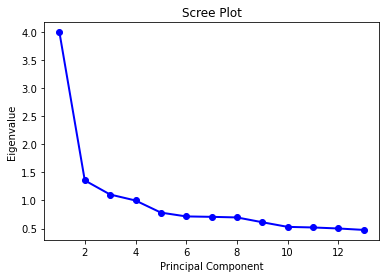

In [57]:
values = np.arange(1,14)
eigenvalues = pd.DataFrame(data=fa.get_eigenvalues())
plt.plot(values, eigenvalues.loc[0], 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.show()

In [58]:
fa.get_factor_variance()

(array([1.74620642, 1.60229021, 1.35193188]),
 array([0.13432357, 0.12325309, 0.10399476]),
 array([0.13432357, 0.25757666, 0.36157142]))

EFA example using semopy

In [60]:
print(semopy.efa.explore_cfa_model(junaeb_sk, pval=0.05))

eta1 =~ sk11 + sk9 + sk10 + sk12
eta2 =~ sk7 + sk6
eta3 =~ sk4 + sk2 + sk11 + sk5 + sk3 + sk9 + sk1 + sk6 + sk8 + sk12
eta4 =~ sk11 + sk12 + sk13



## General CFA

In [61]:
#Xf=Xc[['X2','X3','X4','X5','X6','X7','X8','X9']]
junaeb_sk_f = junaeb2[["sk1","sk2","sk3","sk4","sk5","sk6","sk7","sk8","sk9","sk10","sk11","sk12","sk13"]]
mod = """
# measurement model
eta1 =~ sk11 + sk9 + sk10 + sk12
eta2 =~ sk7 + sk6
eta3 =~ sk4 + sk2 + sk11 + sk5 + sk3 + sk9 + sk1 + sk6 + sk8 + sk12
eta4 =~ sk11 + sk12 + sk13
    """

model = semopy.Model(mod)
out=model.fit(junaeb_sk_f)
print(out)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 0.264
Number of iterations: 78
Params: 0.076 1.078 0.309 1.994 1.676 0.130 -0.314 0.919 0.483 1.137 0.850 0.915 0.560 0.991 2.584 1.331 0.241 0.289 0.553 0.318 0.583 0.212 0.097 0.798 0.211 0.207 0.450 0.179 0.071 0.055 0.057 0.038 0.135 0.047 0.066 0.023 0.027 0.145


In [62]:
model.inspect(mode='list', what="names", std_est=True)

,lval,op,rval,Estimate,Est. Std,Std. Err,z-value,p-value
0,sk11,~,eta1,1.000000,0.406330,-,-,-
1,sk11,~,eta3,0.075974,0.042558,0.014305,5.311109,0.0
2,sk11,~,eta4,1.000000,0.230244,-,-,-
3,sk9,~,eta1,1.078224,0.443149,0.202543,5.323422,0.0
4,sk9,~,eta3,0.309210,0.175197,0.012327,25.084745,0.0
5,sk10,~,eta1,1.994004,0.571362,0.375529,5.30986,0.0
6,sk12,~,eta1,1.675642,0.570194,0.365524,4.584219,0.000005
7,sk12,~,eta3,0.130003,0.060986,0.022846,5.690341,0.0
8,sk12,~,eta4,-0.313743,-0.060496,0.080947,-3.875917,0.000106
9,sk7,~,eta2,1.000000,0.313444,-,-,-


In [63]:
semopy.calc_stats(model)

,DoF,DoF Baseline,chi2,chi2 p-value,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
Value,53,78,15052.531606,0.0,154368.405409,0.902784,0.90249,0.856494,0.90249,0.856927,0.070518,75.471034,415.543638,0.264483


In [64]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/PC/Anaconda/Library/bin/graphviz'
semopy.semplot(model, "model.png")

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

## Complete SEM example

SEM example considering both the measurement part and structural part in semopy (data and model provided at https://semopy.com/tutorial.html). This example presents a model where three factors are estimated from the data, where each measurement loads only into one factor. The first part of the model is as noted in section 6 (measurement only). Second part (regrssions) reports the structural relationships between factors, and the last part reports potential correlations between the error in each measure (this could be use in section 6 to improve final model). 

In [36]:
import semopy
import pandas as pd
desc = semopy.examples.political_democracy.get_model()
print(desc)

# measurement model
ind60 =~ x1 + x2 + x3
dem60 =~ y1 + y2 + y3 + y4
dem65 =~ y5 + y6 + y7 + y8
# regressions
dem60 ~ ind60
dem65 ~ ind60 + dem60
# residual correlations
y1 ~~ y5
y2 ~~ y4 + y6
y3 ~~ y7
y4 ~~ y8
y6 ~~ y8


In [37]:
data = semopy.examples.political_democracy.get_data()
#data = junaeb2;
mod = semopy.Model(desc);
res = mod.fit(data)
print(type(mod))

<class 'semopy.model.Model'>


In [38]:
print(mod.inspect())

     lval  op   rval  Estimate  Std. Err    z-value   p-value
0   dem60   ~  ind60  1.482379  0.399024   3.715017  0.000203
1   dem65   ~  ind60  0.571912  0.221383   2.583364  0.009784
2   dem65   ~  dem60  0.837574  0.098446   8.507992       0.0
3      x1   ~  ind60  1.000000         -          -         -
4      x2   ~  ind60  2.180494  0.138565  15.736254       0.0
5      x3   ~  ind60  1.818546  0.151993   11.96465       0.0
6      y1   ~  dem60  1.000000         -          -         -
7      y2   ~  dem60  1.256819  0.182687   6.879647       0.0
8      y3   ~  dem60  1.058174  0.151521   6.983699       0.0
9      y4   ~  dem60  1.265186  0.145151   8.716344       0.0
10     y5   ~  dem65  1.000000         -          -         -
11     y6   ~  dem65  1.185743  0.168908   7.020032       0.0
12     y7   ~  dem65  1.279717  0.159996    7.99841       0.0
13     y8   ~  dem65  1.266084  0.158238   8.001141       0.0
14  dem60  ~~  dem60  3.950849  0.920451   4.292296  0.000018
15  dem6

In [30]:
semopy.semplot(mod, "semmodel.png")

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

<font size="3">**Tarea 4**</font>

<u> *Instrucciones* </u>

Los resultados de los ejericicios propuestos se deben entregar como un notebook por correo electronico a *juancaros@udec.cl* el dia 6/12 hasta las 21:00. Utilizar la base de datos *junaeb2.csv*. La base corresponde a observaciones tomadas de estudiantes de colegio. Las variables tienen la siguiente descripcion:

- sexo: sexo del estudiante
- edad: edad del estudiante (meses)
- imce: indice de masa corporal estandarizado
- vive_padre: si el padre vive en el hogar
- vive_madre: si la madre vive en el hogar
- area: urbana=1, rural=0
- sk1: muestra afecto a padres (1: siempre - 5: nunca)
- sk2: muestra afecto a sus pares (1: siempre - 5: nunca)
- sk3: expresa sus sentimientos (1: siempre - 5: nunca)
- sk4: usa gestos para mostrar sentimientos (1: siempre - 5: nunca)
- sk5: juega con otros (1: siempre - 5: nunca)
- sk6: comparte sus cosas con otros (1: siempre - 5: nunca)
- sk7: es agresivo (1: siempre - 5: nunca)
- sk8: participa en juegos grupales (1: siempre - 5: nunca)
- sk9: hace preguntas a adultos (1: siempre - 5: nunca) 
- sk10: tiene interes por libros (1: siempre - 5: nunca) 
- sk11: tiene interes por su entorno (1: siempre - 5: nunca)
- sk12: juega a armar y desarmar cosas (1: siempre - 5: nunca) 
- sk13: tiene expresiones artisticas (1: siempre - 5: nunca) 
- act_fisica: frecuencia actividad fisica (1: nunca - 5: 5 o mas veces a la semana)
- educm: años de escolaridad de la madre
- educp: años de escolaridad del padre
- madre_work: si la madre trabaja (-1: labor domestica, 0: desempleada, 1: empleada)

Preguntas:

1. Cargue la base de datos y realice los ajustes necesarios para su uso (missing values, recodificar variables, etcetera). Identifique los tipos de datos que se encuentran en la base, realice estadisticas descriptivas sobre las variables importantes (Hint: Revisar la distribuciones, datos faltantes, outliers, etc.) y limpie las variables cuando sea necesario. 

2. Usando las variables sk1-sk13 realice un PCA. En particular, identifique los valores propios y determine el numero optimo de componentes. Luego estime y grafique la distribucion de los componentes. Ademas discuta la importancia relativa de las variables sobre cada uno de los componentes estimados. Que se puede concluir de este analisis?

3. Con los resultados de la Pregunta 2, mantenga los primeros 3 componentes principales. Graficamente indique si existen diferencias significativas entre grupos usando las siguientes variables: sexo, area, madre_work y act_fisica. Que puede concluir de los resultados?

4. A partir del mismo set de variables sk1-sk13 realice un EFA. En particular determine el numero optimo de factores y las variables que se asocian a cada factor. Tambien discuta si existen variables que no son informativas (Hint: para realizar un EFA, todas las variables deben estar representatadas en el mismo sentido logico. Si una carateristica es negativa debe ser invertida en la escala, de tal forma que todas las variables representen aspectos positivos).

5. Con los resultados obtenidos en la Pregunta 4, proponga un CFA donde cada variable solo se asocia con un factor. Entregue un nombre a cada factor que representa el concepto comun entre todas las variables. Reporte la importancia de cada medida (variable) a cada factor e indique la correlacion entre factores. 

6. Finalmente, implemente un SEM completo usando la estructura propuesta en la Pregunta 5. En particular, estime un modelo donde los factores explican el nivel de actividad fisica, junto con otras variables que existen en la base de datos. Ademas utilice otras variables relevantes de la base de datos para explicar los factores latentes. Las variables a incluir en el modelo final deben tener sustento teorico y el modelo final debe optimizar el ajuste a los datos, en base a los criterios vistos en clase. Que puede concluir en base a sus resultados?


1. Cargue la base de datos y realice los ajustes necesarios para su uso (missing values, recodificar variables, etcetera). Identifique los tipos de datos que se encuentran en la base, realice estadisticas descriptivas sobre las variables importantes (Hint: Revisar la distribuciones, datos faltantes, outliers, etc.) y limpie las variables cuando sea necesario. 

Durante la primera parte de este notebook se realiza la limpieza de variables, acotando los espacios muestrales segun los gráficos al igual que tareas anteriores. Se realiza una limpieza de outliers debido a su nivel de impacto negativo en métodos basados en desviaciones estandar relativas, como el PCA y la búsqueda de factores. 

2. Usando las variables sk1-sk13 realice un PCA. En particular, identifique los valores propios y determine el numero optimo de componentes. Luego estime y grafique la distribucion de los componentes. Ademas discuta la importancia relativa de las variables sobre cada uno de los componentes estimados. Que se puede concluir de este analisis?

Lo primero para trabajar un PCA es lo realizado en el punto anterior, ya que al trabajar con varianzas de variables, este método es extremadamente sensible a outliers. Con el objetivo de representar en menor dimensión una ecuación con demasiadas variables.
En este cálculo se utilizan las variables sk1…13, sin incluirse en la formación de componentes principales las variables binarias como sexo, area… etc. Serán usadas posteriormente para la comparación entre grupos de los componentes principales. 
El mapa de calor de las correlaciones entre variables podemos ver que es bastante alejada de lo esperado, en especial la variable 7 que sigue un camino contrario (en especificación) a las demás. Esto será comentado más a fondo posteriormente. 
	El objetivo del método PCA es reducir la cantidad de información inútil utilizada en la explicación de los datos. En este caso, con la data de junaeb2, se puede resumir las 13 variables sk1 a sk13 en 5 componentes principales. La información aportada por cada variable disminuye desde el cuarto componente por lo que un corte también sería justificado.
Además, podemos ver en el mapa de calor la correlación entre las variables, notándose un gran aumento y fuerza entre esto. Pero la parte importante es que se asume que luego (o se espera) no haya correlación entre los componentes principales creados. 

3. Con los resultados de la Pregunta 2, mantenga los primeros 3 componentes principales. Graficamente indique si existen diferencias significativas entre grupos usando las siguientes variables: sexo, area, madre_work y act_fisica. Qué puede concluir de los resultados?

Realmente, en las variables de sexo, área, y trabajo de la madre no se enncuentra una diferencia significativa entre el primer y el segundo grupo. Ya que los resultados no son divididos longitudinalmente como se esperaba que fuese el resultado. Esto quiere decir que realmente no hay diferencia significativa entre ambos grupos, la correlación de ambos grupos debe de estar hecha de manera que intra grupos existe una cantidad similar a la entre grupos. 
Auqneu solo se compararon los dos primeros componentes/ grupos, esto es suficiente para definir que entre ellos apra las variables estudiadas no existe diferenciación significativa. 
Sin embargo, lo que si nos dice es que ambos componentes estan entregando información porque no hay forma de definir entre grupos por el eje x o y. Al tener tendencias diagonales. Si muestra una tendencia similar de forma en los gráficos.

4. A partir del mismo set de variables sk1-sk13 realice un EFA. En particular determine el numero optimo de factores y las variables que se asocian a cada factor. Tambien discuta si existen variables que no son informativas (Hint: para realizar un EFA, todas las variables deben estar representatadas en el mismo sentido logico. Si una carateristica es negativa debe ser invertida en la escala, de tal forma que todas las variables representen aspectos positivos).


Para trabajar un EFA, se transforman las variables que representan características negativas, como “es agresivo” sk7, que va en el sentido contrario a la lógica de las demás variables. 
Con esto se busca agrupar a las variables en factores no observables en vez de componentes principales. Todas las variables son representadas dentro de estos factores, por lo que se entiende que todas aportan cierto grado de información al sistema. La variable 12 se presenta en tres factores, dando cuenta de su importancia relativa al sistema. 
Se obtienen cuatro factores formados de tal manera:
eta1 =~ sk11 + sk9 + sk10 + sk12
eta2 =~ sk7 + sk6
eta3 =~ sk4 + sk2 + sk11 + sk5 + sk3 + sk9 + sk1 + sk6 + sk8 + sk12
eta4 =~ sk11 + sk12 + sk13

Se puede notar que la variable 13 solo se presenta en un factor que acomoda tres variables repetidas, por lo que es probable que esta variable no entregue información importante. 
Para usar los modelos de EFA se utilizó el modelo entregado por el código de python y no un orden específico de las variables según los pesos relativos para ver el aporte en relación a la variable más importante. Esto en favor de la factibildad computacional de los miembros del grupo. 

5. Con los resultados obtenidos en la Pregunta 4, proponga un CFA donde cada variable solo se asocia con un factor. Entregue un nombre a cada factor que representa el concepto comun entre todas las variables. Reporte la importancia de cada medida (variable) a cada factor e indique la correlacion entre factores.

PAra la aplicación de un confirmatory factor analysis, se resume la cantidad de funciones a las cuatro presentadas anteriormente. Se agrupan las variables según el contenido teórico que asigna como información al modelo. Por lo que, los factores quedan tal que:
sk1: muestra afecto a padres (1: siempre - 5: nunca)
sk2: muestra afecto a sus pares (1: siempre - 5: nunca)
sk3: expresa sus sentimientos (1: siempre - 5: nunca)
sk4: usa gestos para mostrar sentimientos (1: siempre - 5: nunca)
sk5: juega con otros (1: siempre - 5: nunca)
sk6: comparte sus cosas con otros (1: siempre - 5: nunca)
sk7: es agresivo (1: siempre - 5: nunca)
sk8: participa en juegos grupales (1: siempre - 5: nunca)
sk9: hace preguntas a adultos (1: siempre - 5: nunca)
sk10: tiene interes por libros (1: siempre - 5: nunca)
sk11: tiene interes por su entorno (1: siempre - 5: nunca)
sk12: juega a armar y desarmar cosas (1: siempre - 5: nunca)
sk13: tiene expresiones artisticas (1: siempre - 5: nunca)

eta1 =~ sk11 + sk9 + sk10 
Factor 1: Tiene interés por su entorno + Hace preguntas a adultos + Tiene interés por Libros. El concepto común podría ser “curiosidad”.

eta2 =~ sk7 + sk6
FActor 2:  Comparte sus cosas +  NO es agresivo.  Por lo que se puede resumir a “compañerismo”.

eta3 =~ sk4 + sk2 + sk5 + sk3 + sk9 + sk1 + sk8 .
Factor 3: Usa gestos para mostrar sentimientos +  Muestra afecto a sus pares + Muestra afecto a sus padres + Juega con otros + Expresa sus sentimientos + Participa en juegos grupales . Resumido a “Expresión Emocional” o “Habilidad 
Afectiva”

eta4 =~ sk12 + sk13
Factor 4 : Tiene expresiones artísticas + Juega a armar y desarmar cosas. Resumido a “Expresión artística”


Es importante notar que la variable 13 podría quedar sola en el factor 4, y que este es no significativo según la tabla entregada. Pudiendo tratarse de una variable que no entrega información importante al modelo. Como se mencionó en la pregunta anterior. Además, el error estandar correlacionado a esta variable juntoa al factor es de los más altos siendo de ~0,6. Y su valor de variación residual es de los más altos. Siendo indicador de que esta variable probablemente tiene demsiado ruido como para ser explicativa dentro del modelo. 

6. Finalmente, implemente un SEM completo usando la estructura propuesta en la Pregunta 5. En particular, estime un modelo donde los factores explican el nivel de actividad fisica, junto con otras variables que existen en la base de datos. Ademas utilice otras variables relevantes de la base de datos para explicar los factores latentes. Las variables a incluir en el modelo final deben tener sustento teorico y el modelo final debe optimizar el ajuste a los datos, en base a los criterios vistos en clase. Que puede concluir en base a sus resultados?

Aunque no se logró acomodar el tipo DataFrame de junaeb2 usando el fit necesario para modelarlo con semopy, por temas de cierre de semestre (y de carrera) que no permitió ajustar bien el tiempo de trabajo en distintas asignaturas. Se puede argumentar teóricamente el modelo que debería resultar. 

En el caso de este ejercicio se puede notar mucha correlación negativa, sin embargo es una buena señal que toda correlación esté en la misma dirección. Sin embargo parece un problema el hecho de que sea tan volátil, incapaaz de presentar un modelo correctamente ajustado. Como el hecho de que el EFA podría mostrar un factor que comparte la variable sk13 que en verdad no presenta información importante. Siendo en verdad tres factores y no cuatro como se mostró hace unas preguntas. 
El modelo total entonces, para predecir el resultado de actividad física con un nivel dimensional menor a las trece variables originales, no resulta de manera favorable en un método de PCA. También, podemos ver como a variable de "jugar a armar y desarmar cosas" no tiene importancia significativa dentro del modelo presentado. 

Solo viendo los resultados de los valores p, de los errores estimados, y las variables en general con sus factores presentados. Los primeros tres factores están explicando el resultado afectando la predicción de resultado de actividad física. El peso relativo mayor es del factor de expresión emocial "juega con otros", lo cual tiene sentido desde un punto de vista lógico. Si la persona se siente más cómodma con sí misma y su entorno tenderá a dejar mayor cantidad de tiempo para interactuar. Sin embargo la variable menos importante que es la variable de armar y desarmar cosas, no tiene valor para la actividad física. Ya que no tiene un sentido de conexión entre ambas variables. 

En caso de que las respuestas no le convenzan, el grupo de trabajo está abierto a discutir los resultados y procedimientos. Ya que, irónicamente, desde el día de la entrega de este trabajo, quedamos casi completamente liberados de responsabilidades académicas.
